# Topic of Labs

This week's labs will involve some further explorations of topics we have begun in class. 

## Lab 1

 * Build a Python library our of Week 6 Lecture 2 material.  This is a Victoria Police Department crime stats library.  We start with the *vicpd.py* library, which is a collation of everything we did in Week 6, Lecture 2.  
 
 * Use **dir(vicpd)** to list the commands available in the vicpd library, or just load the file and look.
 
 * We continue exploring the VicPD and weather stats, looking to make inferences with the data. 
 

In [1]:
import vicpd as vpd

Loading the VicPD library.
[cdata] 5 years and 150 days of crime data. 86607 records total.
[ctypes] tree structure of crime types
[all_tots] totals for crime types
[all_freq] relative frequencies of crime types
[weekdaycount] loaded
[weekdaypct] loaded
[presentBDWeek] loaded
[wdatlist] 5 years and 177 days of weather data, dict of (max c, min c, mean c, rain mm, snow cm) indexed on date
VicPD library loaded.


**Suggestions**

- Make a variety of plots, of one daily crime count vs another. 

- Look for linear relationships, or perhaps non-linear relationships using least-squares. 

- Look for phenomena you might expect, like high accident counts after freezing rain. 

- If you find such, perhaps plot them spatially.  Do they occur on hills? 

In [2]:
import pprint as pp
pp.pprint(vpd.all_tots)

defaultdict(<class 'int'>,
            {'Alarm': 904,
             'Arson': 182,
             'Assault': 2215,
             'Assault with Deadly Weapon': 1208,
             'Breaking & Entering': 3616,
             'Community Policing': 34,
             'Disorder': 2673,
             'Drugs': 2720,
             'Liquor': 7894,
             'Other': 16515,
             'Property Crime': 5785,
             'Robbery': 544,
             'Theft': 14685,
             'Theft from Vehicle': 6643,
             'Theft of Vehicle': 871,
             'Traffic': 15127,
             'Vehicle Stop': 4318,
             'Weapons Offense': 673,
             ('Alarm', 'FALSE ALARMS'): 904,
             ('Arson', 'ARSON-DISREGARD FOR HUMAN LIFE'): 12,
             ('Arson', 'ARSON-PROPERTY'): 170,
             ('Assault', 'ASSAULT AGAINST POLICE OFFICER'): 300,
             ('Assault', 'ASSAULT-COMMON OR TRESPASS'): 1556,
             ('Assault', 'ASSAULTS-OTHER'): 359,
             ('Assault with Deadly 

In [3]:
print(vpd.weekdaycount( ('Vehicle Stop', 'CYCLIST')  ))

[155, 162, 198, 182, 169, 115, 110]


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


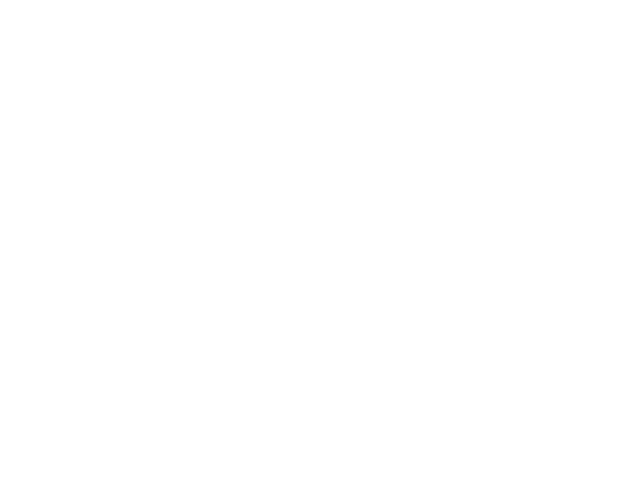

In [4]:
x, y = vpd.xyplot('Traffic', 'COLLISION-DAMAGE UNDER $1000', 1 )
import matplotlib.pyplot as plt
%pylab nbagg
plt.title("Min daily temp vs. number of collisions on that day")
plt.scatter(x,y)

## What we really want to do

**Question** Is look at on day $x$ if it rains, freezes that *night*, is there a disproporionate number of accidents on day $x+1$? 

**Strategy** 

 * Iterate through every day in the weather data. 
 * Look for days with rain, and min temperature < 0. 
 * Check to see if we have the crime data for the **next** day.
 * Count car accidents above and below \$1000. 
 
 * Compare these numbers to normal days. 
 
**Once you have complete this**

 * Do accidents after freezing rain happen on hills?  Intersections? Make a heat map of all the accident locations. 

In [5]:
import datetime as dt
vpd.wdatlist[ dt.date(2016, 1, 16) ]
## weather data Jan 16th, 2016. 
## Max 10.2 c
## Min 4.6 c
## Mean 7.4 c
## 11.8mm rain! 
## 0.0 cm snow.

(10.2, 4.6, 7.4, 11.8, 0.0)

In [6]:
## vpd.wdatlist is dictorary:
## indexed by date
## vpd.wdatlist[date data] = (max c, min c, mean c, rain cm, snow cm)

f_rain_events = []

## iterating the wdatlist dictionary
for dat, wdat in vpd.wdatlist.items():
    ## dat is the date, wdat is wdatlist[dat], i.e. the weather tuple
    if (wdat[1]<0.0) and (wdat[3]>0.0):
        #print("date = ",dat, "weather = ", wdat)
        f_rain_events.append(dat)

print(len(f_rain_events), " freezing rain events.")
sfre = sorted(f_rain_events)
#for x in sfre:
#    print(x)
    

80  freezing rain events.


In [7]:
## Let's look for crime records on f_rain_events day + 1. 
##  for this we need the timedelta object (a difference of dates)
one_day = dt.timedelta(1) ## see time delta docs

hdata = []

tinc_after = []
for x in f_rain_events:
    next_day = x + one_day
    ## let's look for next_day in the crime data. 
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            tinc_after.append(c)
            hdata.append( [c.latitude, c.longitude, 0.02] )
print(len(tinc_after), "  ? maybe relevant ? traffic events after freezing rain, on all days.")
print(len(f_rain_events), " total days w/ freezing rain. ")
print("Average of ", len(tinc_after)/len(f_rain_events), " per freezing rain day. " )

## let's compare to "normal days".  Normal will mean, not a freezing rain day. 
## all dates. . .
allothdats = [k+one_day for k in vpd.wdatlist.keys() if (k not in f_rain_events)]
oth_coll = []
oth_hdata = []
print(len(allothdats), " total other days")
for x in allothdats:
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            oth_coll.append(c)
            oth_hdata.append( [c.latitude, c.longitude, 0.02] )
print("Average of ", len(oth_coll)/len(allothdats), " per non-freezing rain day. " )

167   ? maybe relevant ? traffic events after freezing rain, on all days.
80  total days w/ freezing rain. 
Average of  2.0875  per freezing rain day. 
1922  total other days
Average of  2.0  per non-freezing rain day. 


In [8]:
## let's build a heat map of collisions after freezing rain. 
expaths = ["/usr/lib/python3/dist-packages", "/usr/local/lib/python3.5/dist-packages"]
for xp in expaths:
    if (xp not in sys.path):
        sys.path.append(xp)

## sudo pip install folium

import folium as fo
from folium import plugins as fpl

mapa = fo.Map([48.4323, -123.3720], tiles='Stamen Terrain', zoom_start=13)
mapa.add_children(fpl.HeatMap(hdata))
#mapa.create_map(path='assault.wdw.heatmap.html')
mapa


## Lab 2

Today, we will use an ordinary least squares method to see which crime types are most correlated with mean temperature.

Ultimately, we would like to use the statsmodels.api library, specifically the OLS function found here: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html

This gives us an indication of how likely it is that a linear relationship exists between two sets of numbers.
In this case, we would like one list to be the mean temperatures, and the other list to be the average number of crimes on a day with that mean temperature. 

### Data types
vpd.ccdata is a dictionary whose keys are tuples. For each day with weather data, the key is (xd.incident_datetime.date(),xd.parent_incident_type, xd.incident_type_primary), as seen in the bottom of vicpd.py. The value associated with that key is the number of crimes of those types on that day.  

The next two code blocks are some examples of looping through this dictionary.

In [46]:
#Check to see that weather data actually does exist for each date in the ccdata keys
for key, numcrimes in vpd.ccdata.items():
    if key != 0:
        if not (key[0] in vpd.wdatlist):
            print("Missing weather data for date ", key[0], " in ccdata")
            ##looks good!

In [47]:
# one of the keys is the integer 0 instead of a tuple, so lets skip over that element when we loop through.
for key, numcrimes in vpd.ccdata.items():
    if key != 0:
        if key[1] == 'Breaking & Entering':
            if numcrimes > 5:
                print("there were ", numcrimes, " crimes of type ", key[2], " on ", key[0])

there were  6  crimes of type  BREAK & ENTER-BUSINESS  on  2012-08-03
there were  7  crimes of type  BREAK & ENTER-BUSINESS  on  2012-12-10
there were  7  crimes of type  BREAK & ENTER-RESIDENCE  on  2014-04-14


In [48]:
## Let's construct the list of mean temperatures first. 
## Temperatures are floats, so int(temp) will return that float rounded down to the nearest integer.
 
## To do this, lets loop through vpd.wdatlist
mintemp = 100
maxtemp = 0
'''find the mintemp and maxtemp below'''

for weathertuple in vpd.wdatlist.values():
    if weathertuple[2] < mintemp:
        mintemp = weathertuple[2]
    if weathertuple[2] > maxtemp:
        maxtemp = weathertuple[2]

In [49]:
tempBuckets = range(int(mintemp), int(maxtemp)+1)
tempBuckets

range(-5, 26)

In [51]:
## Now, we want the build another list containing the average number of crimes on a day with that mean temperature
# First, let us find the number of crimes (of a certain type) occuring on days with a given temperature.

#helpful function: calling "tempBuckets.index(temp)" returns the first index where temp appears in the list
# tempBuckets.

numCrimesbyTemp = [0 for temp in tempBuckets]
'''populate array below'''
# key = (crime_date, parent_incident_type, incident_type_primary)
for key, numcrimes in vpd.ccdata.items():
    if key != 0:
        if key[1] == 'Breaking & Entering':
            # remember key[0] = date, and wdatlist is a dictionary with dates as keys.
            tempFloor = int(vpd.wdatlist[key[0]][2])
            numCrimesbyTemp[tempBuckets.index(tempFloor)] += numcrimes

In [52]:
print(numCrimesbyTemp)

[0, 2, 6, 13, 21, 35, 62, 104, 164, 186, 160, 164, 221, 189, 192, 167, 175, 156, 171, 175, 184, 194, 247, 153, 61, 51, 14, 16, 1, 0, 3]


<IPython.core.display.Javascript object>


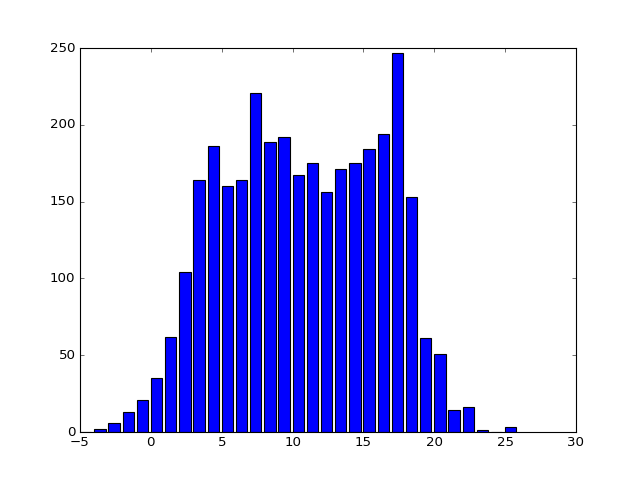

<Container object of 31 artists>

In [53]:
plt.close()
plt.bar(tempBuckets, numCrimesbyTemp)

In [60]:
numDaysbyTemp = [0 for temp in tempBuckets]
'''loop through vpd.wdatlist to find the number of days with each temperature'''

for wdata in vpd.wdatlist.values():
    numDaysbyTemp[int(wdata[2])] += 1

In [64]:
print(numDaysbyTemp) 
#We will have to deal with division by zero in the next step if we leave the list like this.
#Notice that we don't actually want the higher temperatures, since there are very few (or none) for each temperature.
# So, let's slice off the last 8 values of each of our arrays (to keep them the same size)

#
tempBuckets = tempBuckets[:20]
numCrimesbyTemp = numCrimesbyTemp[:20]
numDaysbyTemp = numDaysbyTemp[:20]

[47, 49, 59, 90, 107, 115, 112, 140, 117, 96, 103, 98, 90, 108, 121, 119, 123, 121, 71, 37, 23, 13, 10, 1, 0, 1, 1, 1, 6, 9, 14]


In [65]:
avgCrimeperDaybyTemp = [0 for i in range(len(numDaysbyTemp))]
'''now, combine numDaysbyTemp and numCrimesbyTemp'''

for i in range(len(numDaysbyTemp)):
    avgCrimeperDaybyTemp[i] = numCrimesbyTemp[i]/numDaysbyTemp[i]
print(avgCrimeperDaybyTemp)

[0.0, 0.04081632653061224, 0.1016949152542373, 0.14444444444444443, 0.19626168224299065, 0.30434782608695654, 0.5535714285714286, 0.7428571428571429, 1.4017094017094016, 1.9375, 1.5533980582524272, 1.6734693877551021, 2.4555555555555557, 1.75, 1.5867768595041323, 1.403361344537815, 1.4227642276422765, 1.2892561983471074, 2.408450704225352, 4.72972972972973]


<IPython.core.display.Javascript object>


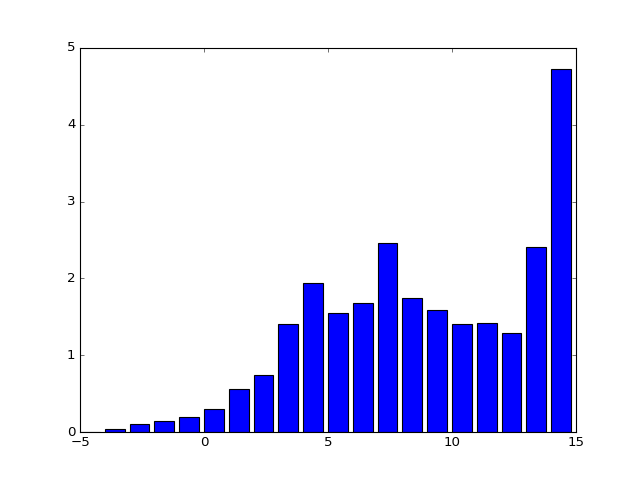

<Container object of 20 artists>

In [66]:
'''and bar plot tempbuckets vs avgCrimeperDaybyTemp'''
plt.close()
plt.bar(tempBuckets, avgCrimeperDaybyTemp)

Now the stats:

In [67]:
import statsmodels.api as sm

In [68]:
X = sm.add_constant(tempBuckets) ## x
Y = avgCrimeperDaybyTemp ## y

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     34.80
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           1.39e-05
Time:                        18:33:12   Log-Likelihood:                -19.596
No. Observations:                  20   AIC:                             43.19
Df Residuals:                      18   BIC:                             45.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5853      0.193      3.037      0.0